This script aims to provide a comprehensive credit risk scoring solution using the XGBoost algorithm. It encompasses data preprocessing, model development, evaluation, and potential avenues for further enhancement.

Key Highlights:

Data Manipulation: The initial phase involves thorough data cleaning, feature engineering, and handling missing values. Each step is carefully documented for transparency and reproducibility.
Model Building: XGBoost, a powerful gradient boosting framework, is employed to create a robust credit risk scoring model. Hyperparameter tuning techniques such as grid search or random search are applied to optimize model performance.
Evaluation Metrics: Evaluation metrics like accuracy, precision, recall, and F1-score are used to assess the model's performance. Additionally, techniques such as cross-validation are implemented to ensure reliable results.
Insights: Interpretability of the model is addressed through feature importance analysis, SHAP (SHapley Additive exPlanations) values, and visualizations, aiding in understanding the key factors influencing credit risk assessment.
Model Deployment & Extension: This script not only provides a robust model but also encourages extensions or modifications. It outlines potential areas for improvement, feature augmentation, and scalability considerations for real-world deployment.
By structuring the script in a clear and modular fashion, it's designed to facilitate learning, encourage contributions, and serve as a foundation for further exploration and innovation in credit risk assessment.

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
sample = pd.read_csv("credit_risk_dataset.csv")

In [5]:
sample.sample(10).T

,24732,26985,31867,24996,3157,22563,6243,5522,26703,14815
person_age,28,28,46,30,24,28,22,25,29,26
person_income,75000,50000,180000,36000,35000,90000,30000,45000,110000,39000
person_home_ownership,MORTGAGE,RENT,MORTGAGE,RENT,RENT,RENT,RENT,MORTGAGE,MORTGAGE,RENT
person_emp_length,2.0,1.0,31.0,5.0,7.0,0.0,6.0,3.0,1.0,3.0
loan_intent,MEDICAL,EDUCATION,VENTURE,EDUCATION,EDUCATION,VENTURE,EDUCATION,DEBTCONSOLIDATION,EDUCATION,MEDICAL
loan_grade,B,C,B,C,A,A,A,A,E,D
loan_amnt,20000,15000,18000,11500,3500,7200,6000,4000,12800,15000
loan_int_rate,12.18,10.28,9.91,15.27,6.99,5.42,7.51,8.59,16.82,15.37
loan_status,0,0,0,1,0,0,0,0,0,1
loan_percent_income,0.27,0.3,0.1,0.32,0.1,0.08,0.2,0.09,0.12,0.38


In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
sample.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
sample.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [9]:
sample.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
# Defining Decision Variable
sample['prior_default'] = sample['cb_person_default_on_file'].apply(lambda x: 1 if x =="Y" else 0)

In [11]:
print(sample.columns)
#  num_cols = sample.select_dtypes(include=['int', 'float']).columns.tolist()
#  cat_cols = sample.select_dtypes(include=['object']).columns.tolist()
Numeric_columns = ['person_age', 'person_income',
       'person_emp_length','loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length', 'prior_default']
sample[Numeric_columns].corr()

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'prior_default'],
      dtype='object')


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,prior_default
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133,0.005807
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987,-0.003613
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699,-0.027728
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967,0.039081
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696,0.501072
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529,0.179141
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690,0.035910
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000,0.004564
prior_default,0.005807,-0.003613,-0.027728,0.039081,0.501072,0.179141,0.035910,0.004564,1.000000


Univariate and Bivariate Analysis to understand the data better

In [12]:
for item in sample.columns.to_list():
    print(f"Value counts for {item}:\n")
    # Use pd.DataFrame to create a table of value counts
    value_counts_table = pd.DataFrame(sample[item].value_counts())
    print(value_counts_table)
    print("\n")

Value counts for person_age:

            count
person_age       
23           3889
22           3633
24           3549
25           3037
26           2477
27           2138
28           1854
29           1687
30           1316
21           1229
31           1142
32            964
33            856
34            709
35            620
36            548
37            478
38            373
39            302
40            271
41            241
42            188
43            164
44            141
45            108
46             94
47             94
48             75
50             52
49             49
51             39
52             36
53             30
54             24
55             20
58             19
20             15
60             15
56             15
57             15
65              9
61              9
66              9
70              7
62              7
64              7
59              5
69              5
63              3
144             3
73              3
123             

In [13]:
sample['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [14]:
sample['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [15]:
sample['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

loan_intent wrt loan default
Axes(0.125,0.11;0.775x0.77)


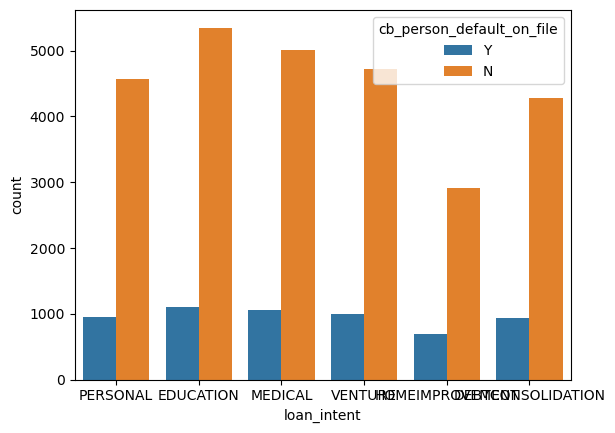

In [16]:
cat = ['person_home_ownership', 'loan_intent', 'loan_grade']
print(cat[1], "wrt loan default")
print(sns.countplot(data = sample,x=cat[1],hue ='cb_person_default_on_file'))

loan_grade wrt loan default
Axes(0.125,0.11;0.775x0.77)


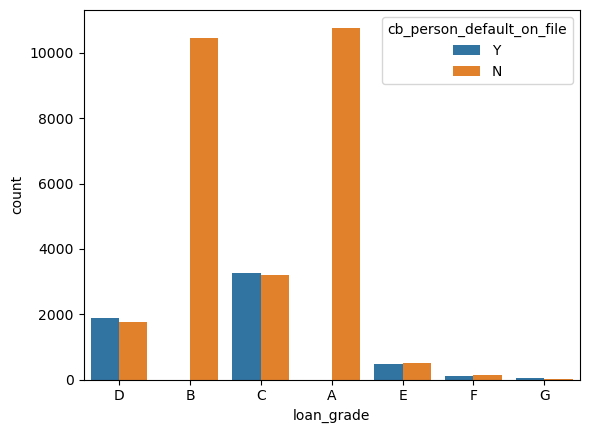

In [17]:
print(cat[2], "wrt loan default")
print(sns.countplot(data = sample,x=cat[2],hue ='cb_person_default_on_file'))

person_home_ownership wrt loan default
Axes(0.125,0.11;0.775x0.77)


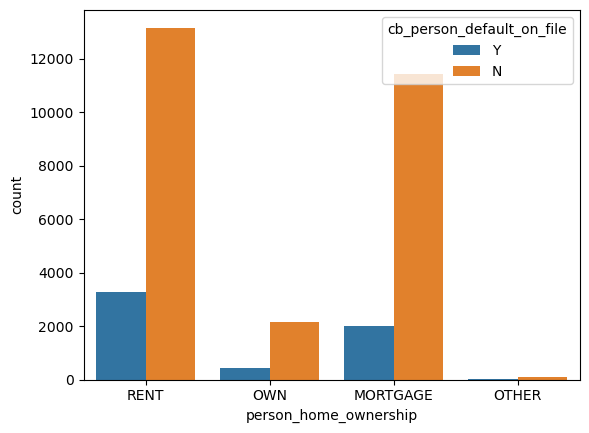

In [18]:
print(cat[0], "wrt loan default")
print(sns.countplot(data = sample,x=cat[0],hue ='cb_person_default_on_file'))

In [19]:
#  Numerical Data Visual Analysis
num_cols = sample.select_dtypes(include = ['int','float']).columns.to_list()
print(num_cols)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length', 'prior_default']


person_age wrt Credit Default


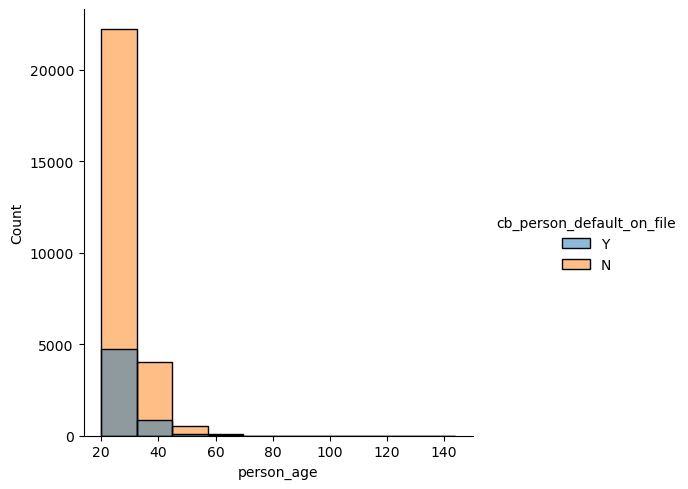

In [20]:
# will try to understand the influence of numerical data on outcome default and also try to identify if each data feature has some segmented behavior
print(num_cols[0], 'wrt Credit Default')
sns.displot(sample, x=num_cols[0], hue = "cb_person_default_on_file", bins = 10)

person_income wrt Credit Default
11694    75000
32417    52000
1209     25000
28103    82863
2503     18000
Name: person_income, dtype: int64


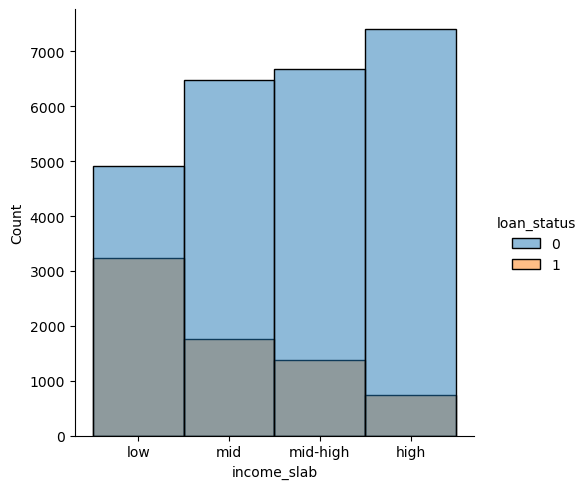

In [22]:
print(num_cols[1], 'wrt Credit Default')
# sns.displot(sample, x=num_cols[1], hue = "cb_person_default_on_file")
print(sample[num_cols[1]].sample(5))
sample['income_slab'] = pd.qcut(sample[num_cols[1]],q = 4, labels = ['low','mid','mid-high','high'])
sns.displot(sample,x = "income_slab", hue = 'loan_status')

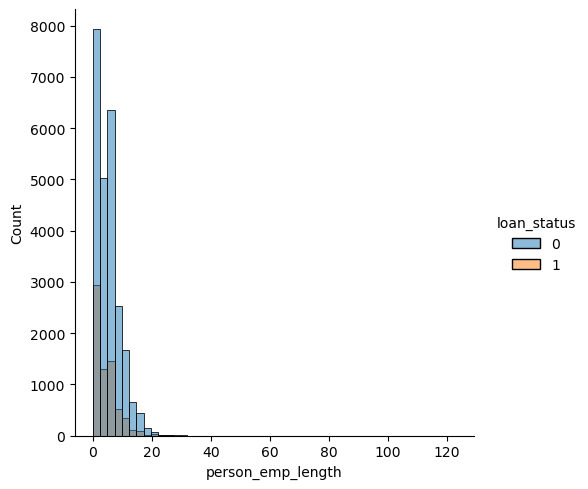

In [23]:
sns.displot(sample,x = num_cols[2], hue = 'loan_status', bins =50)

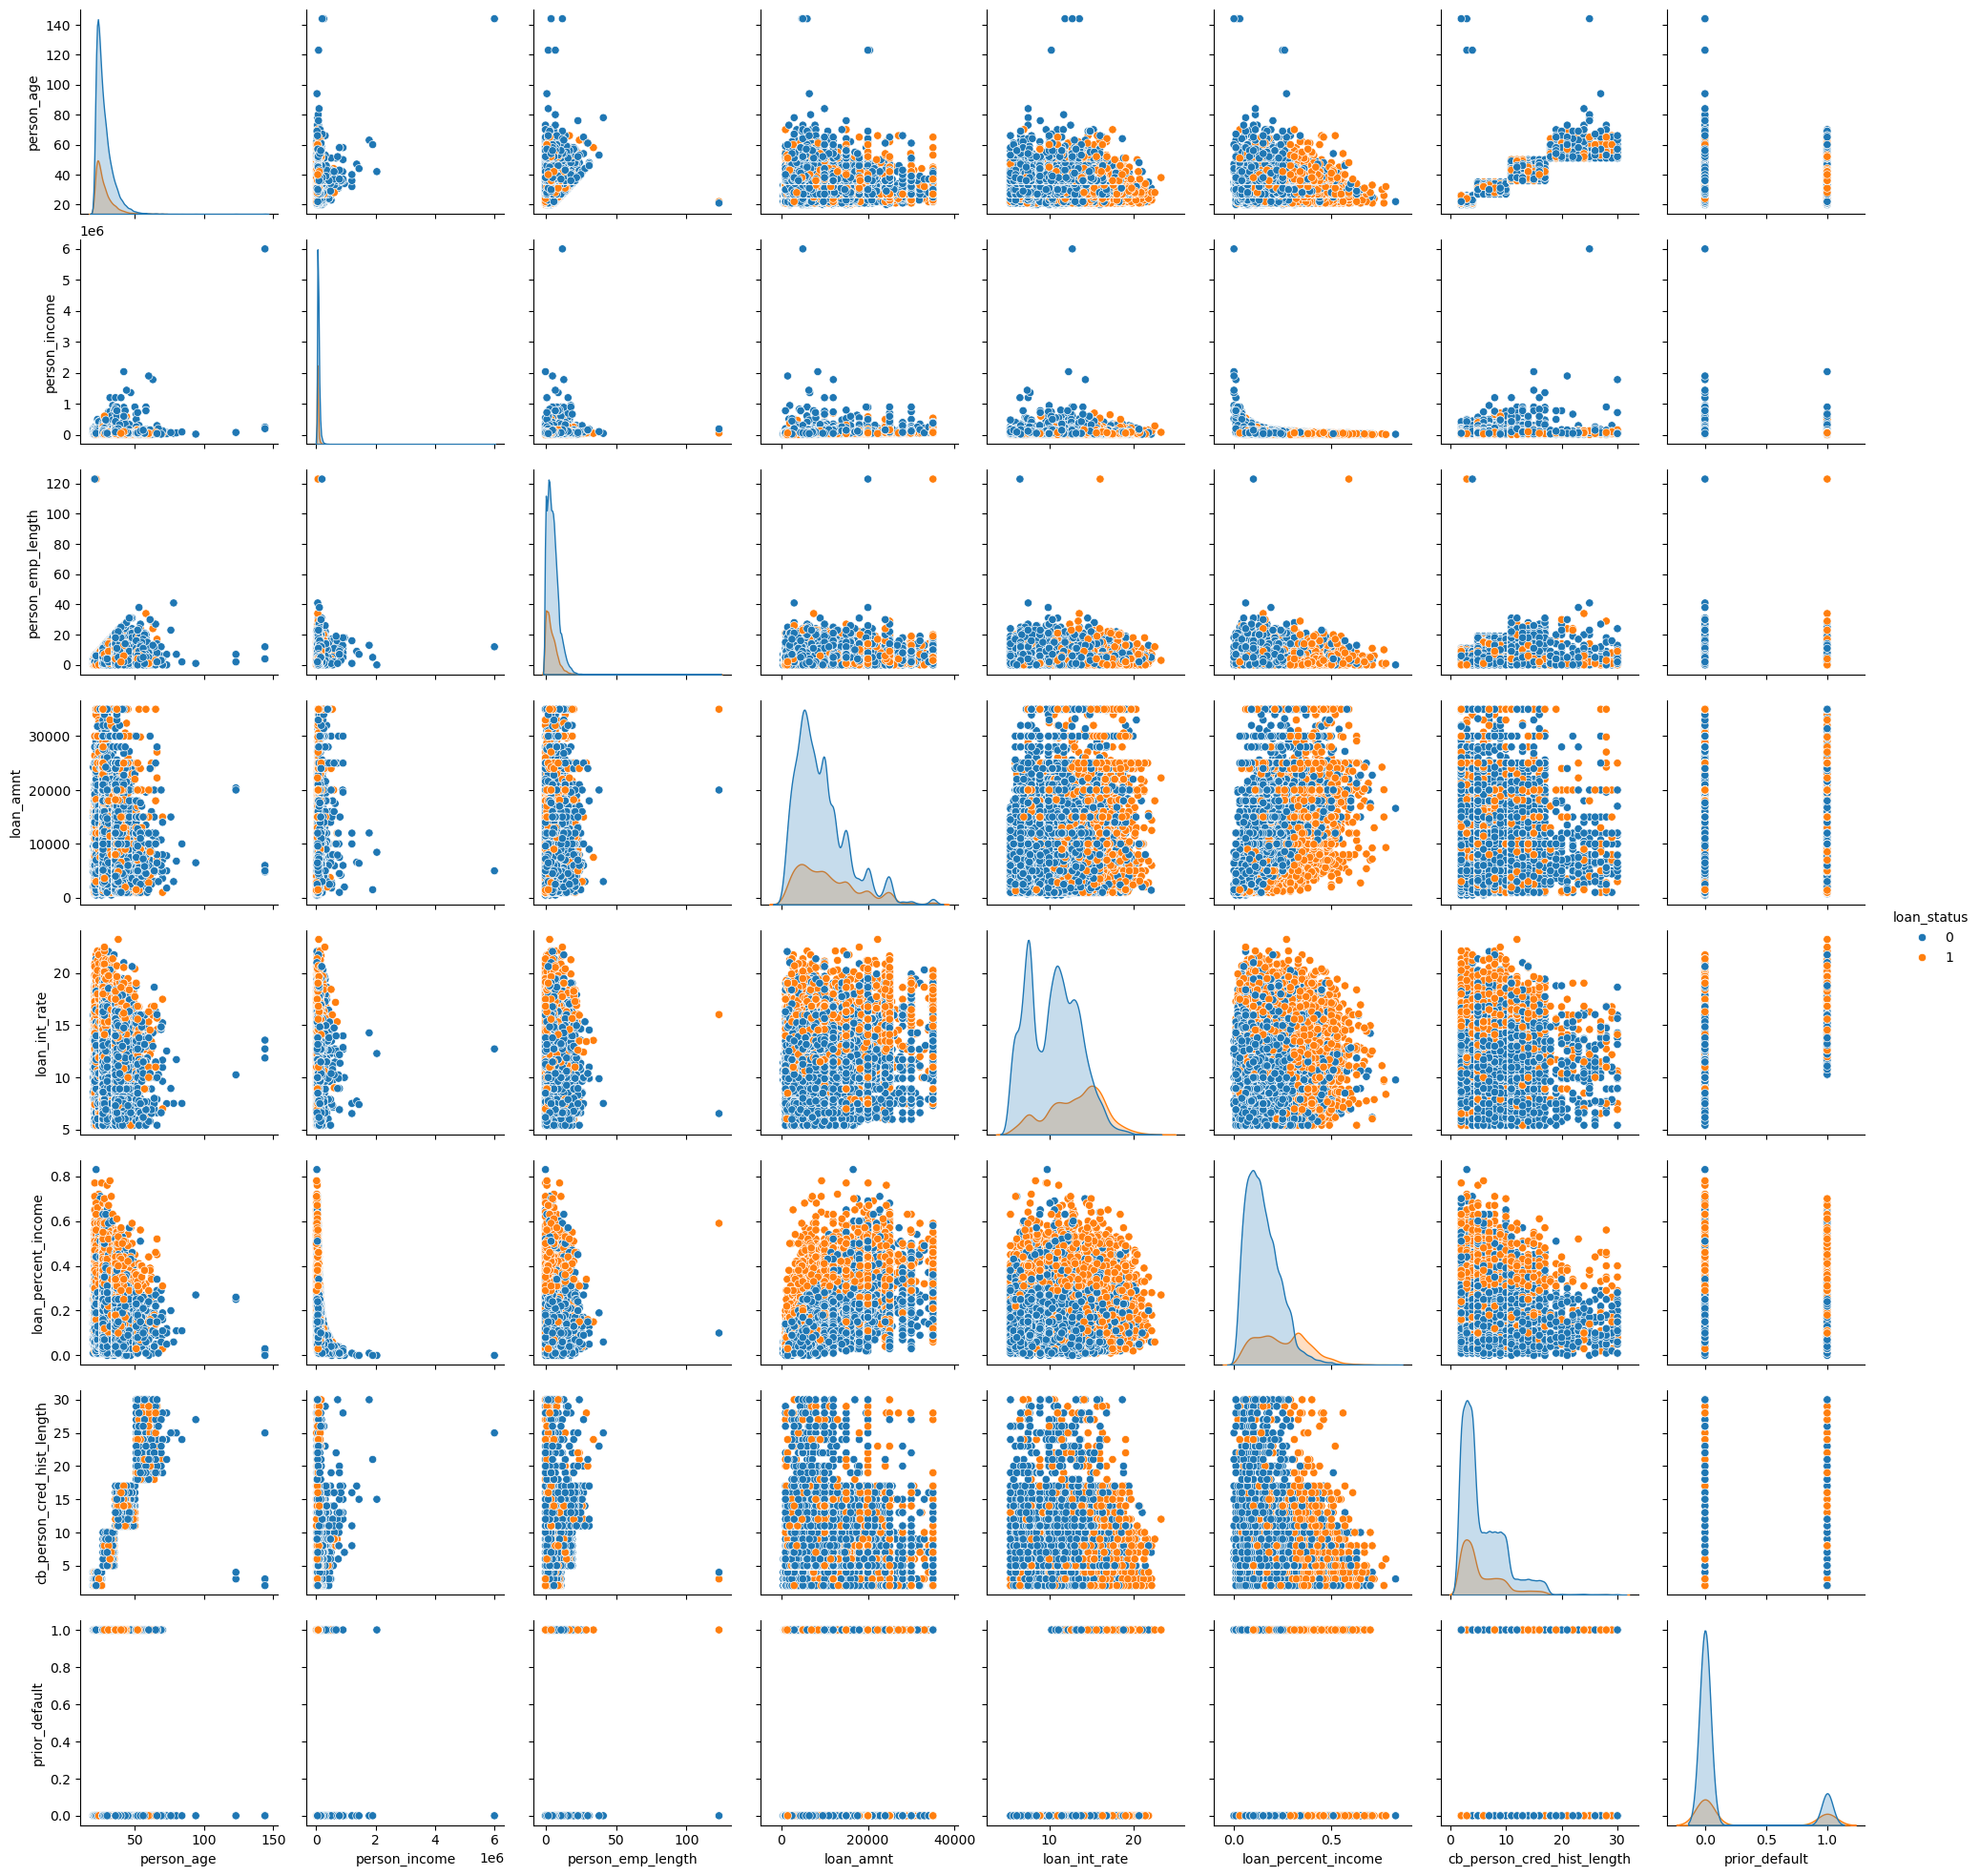

In [24]:
sns.pairplot(sample,hue="loan_status")

One Hot and Correlation matrix to find important correlations in the data

In [25]:
data = sample.drop(cat, axis = 1).join(pd.get_dummies(sample[cat]))

In [26]:
#  Mapping it into appropriate order
income_map ={'low':1, 'mid':2, 'mid-high':3,'high':4}
data['income_slab'] = data['income_slab'].map(income_map)
data['income_slab'] = pd.to_numeric(data['income_slab'].map(income_map), errors='coerce').astype('Int64')

In [27]:
data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,prior_default,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,Y,3,1,...,False,True,False,False,False,False,True,False,False,False
1,21,9600,5.0,1000,11.14,0,0.10,N,2,0,...,False,False,False,False,True,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,N,3,0,...,True,False,False,False,False,True,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,N,2,0,...,True,False,False,False,False,True,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,Y,4,1,...,True,False,False,False,False,True,False,False,False,False


In [28]:
data.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'prior_default', 'income_slab', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G'],
      dtype='object')

In [29]:
cat_col = ['prior_default','person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G']

# data.groupby("loan_status").count()[cat_col].T

contingency_tables = {}

for col in cat_col:
#     contingency_table = pd.crosstab(data[col], data['loan_status'])
    contingency_table = pd.crosstab(data[col], data['loan_status'], normalize='index') * 100
    contingency_tables[col] = contingency_table

# Create an empty list to hold the DataFrames for concatenation
output_dfs = []

# Populate the output DataFrames list
for col, table in contingency_tables.items():
    table = table.reset_index()
    table.columns = ['loan_status', '0', '1']
    table['categorical_variable'] = col  # Add categorical variable name
    table = table[['categorical_variable', 'loan_status', '0', '1']]  # Reorder columns
    output_dfs.append(table)

# Concatenate the DataFrames from the list
output_df = pd.concat(output_dfs, ignore_index=True)

print(output_df)

              categorical_variable  loan_status          0          1
0                    prior_default            0  81.606797  18.393203
1                    prior_default            1  62.193211  37.806789
2   person_home_ownership_MORTGAGE            0  71.688352  28.311648
3   person_home_ownership_MORTGAGE            1  87.429337  12.570663
4      person_home_ownership_OTHER            0  78.213340  21.786660
5      person_home_ownership_OTHER            1  69.158879  30.841121
6        person_home_ownership_OWN            0  76.947695  23.052305
7        person_home_ownership_OWN            1  92.530960   7.469040
8       person_home_ownership_RENT            0  88.125194  11.874806
9       person_home_ownership_RENT            1  68.430013  31.569987
10   loan_intent_DEBTCONSOLIDATION            0  79.473127  20.526873
11   loan_intent_DEBTCONSOLIDATION            1  71.412126  28.587874
12           loan_intent_EDUCATION            0  77.047612  22.952388
13           loan_in

Insights from the analysis
Prior defaulters have higher likelihood of defaulting again, thus higher premium or further analysis for approval
Home ownership - Clients with owning their home or having mortage on their home are less likely to default, while others with renting and other means have higher probability of defaulting
Venture and Education loans are relatively less prone to defaults
Loan grade has strong corelation ith defaults, seems loan grades from A to G ave an order of risk for defaults

Data Preprocessing

In [30]:
X = data.drop(['loan_status','cb_person_default_on_file'], axis =1)
y = data['loan_status']
X.shape

(32581, 26)

In [31]:
# Check before deploying the data into model preparation
X.select_dtypes(include=['object', 'category']).columns.tolist()

[]

In [32]:
y.shape

(32581,)

In [33]:
y.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
data = data.drop([col for col in data.columns if pd.isna(col)], axis = 1)

X = data.drop(['loan_status','cb_person_default_on_file'], axis =1)
y = data['loan_status']


x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=2)

In [36]:
xgb.fit (X = x_train,y = y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,xgb.predict(x_test))

array([[7579,   86],
       [ 530, 1580]])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7665
           1       0.95      0.75      0.84      2110

    accuracy                           0.94      9775
   macro avg       0.94      0.87      0.90      9775
weighted avg       0.94      0.94      0.93      9775



In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# Calculate class weights
positive_samples = sum(y == 1)
negative_samples = sum(y == 0)
scale_pos_weight = negative_samples / positive_samples

# Set up XGBoost classifier
xgb_clf = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation and display results for each iteration
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# Display results for each iteration
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"Mean Recall: {mean_score} - Parameters: {params}")

# Get the best model
best_xgb_clf = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_xgb_clf.predict(x_test)
print("\nBest Model Evaluation:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mean Recall: 0.7763065065065067 - Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean Recall: 0.7825107107107108 - Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mean Recall: 0.7943157157157158 - Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Mean Recall: 0.7839123123123123 - Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Mean Recall: 0.7897141141141141 - Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Mean Recall: 0.7973171171171172 - Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Mean Recall: 0.7831111111111111 - Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Mean Recall: 0.788712912912913 - Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean Recall: 0.7923153153153153 - Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_est

In [40]:
best_xgb_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

(22806, 26)


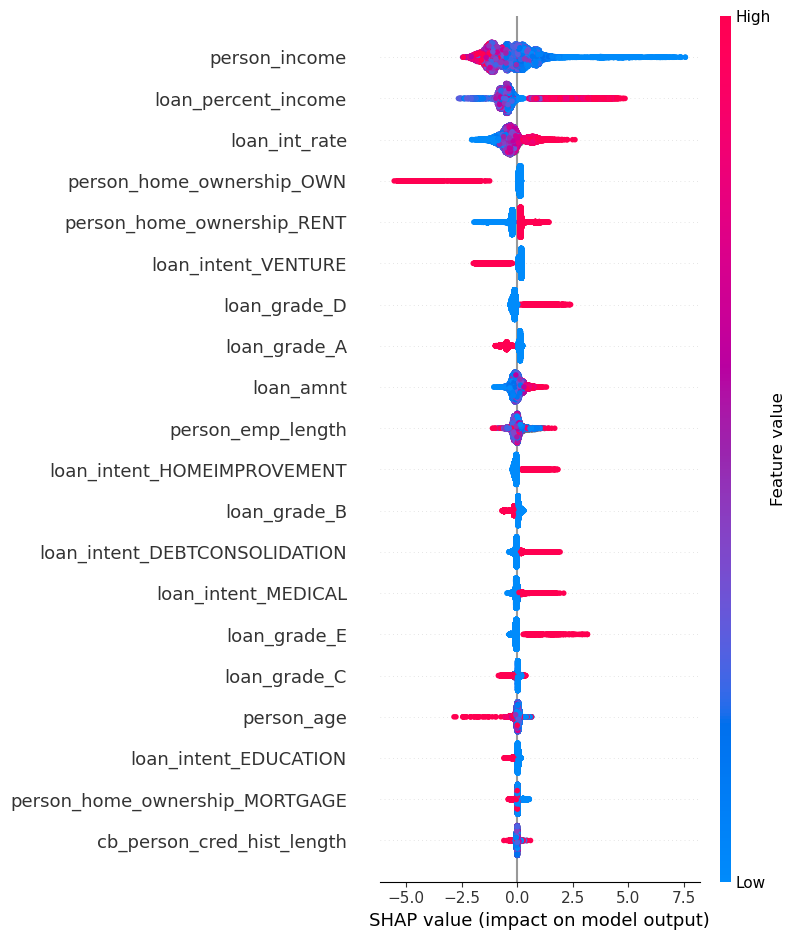

In [43]:
import shap # for interpretation

# Create a SHAP explainer using the trained model and your data
explainer = shap.TreeExplainer(best_xgb_clf)
shap_values = explainer.shap_values(x_train)

# Verify the shape of shap_values
print(shap_values.shape)  # Check the shape of shap_values

# Visualize the SHAP values for a specific instance (e.g., first sample)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], x_train.iloc[0])

# Summary plot to display feature importance
shap.summary_plot(shap_values, x_train)

Here Blue colour indicates the observations with loan status paid and red vice-versa The shap values are the log adjustment of variables to fit in the scale

Highlights
Higher Salary leads to lower loan default
lower loan to income ratio indicates greater capacity to manage the loan
lower loan interest rates directly corresponds to better results
Longer employement rate probably indicates stability, greater reserve capital leading to safer loan candidate Rest observations are identical to the EDA outcomes. Note: All these observations are correlation, not causation. Thus domain knowledge and common sense can help understand the overlying layer for the correlation observed